# COGS 108 - EDA Checkpoint

## Authors
- Jordan Chen: Writing - original draft, Writing - review & editing
- Koji Nakazawa: Conceptualization, Methodology, Software
- Andrew Hoang: Background Research, Visualization
- Amandine Isidro: Data curation, Experimental investigation
- Audrey La Guardia: Analysis, Project Administration

# Research Question

The Goal of this project is to investigate whether it is possible to predict the winner of Crunchyroll's Anime of the Year award using measurable popularity engagement, and production-related variables, in hopes of discovering relationships between fan engagement and media production within the anime industry. specifically, we aim to build a predictive model that uses factors like user rating(data from Crunchyroll, MyAnimeList), social-media engagement(sentiment analysis on Youtube data), hype indicators(trailer, views, and manga popularity), production characteristics(studio and budget) to produce a binary target variable (win/not win). How do factors like rating, engagement, hype, production, and release time affect an anime's chance at winning Crunchyroll's anime of the year? How accurately can we predict the next winner?


## Background and Prior Work

The Crunchyroll Anime Awards is an annual awards ceremony organized by Crunchyroll, one of the world's largest anime streaming platforms. The Crunchyroll Anime Awards is an annual ceremony that recognizes the hard work of animators, producers, and other contributors, covering both fan favorites and critically acclaimed works.<a id="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1) This ceremony was first announced in December of 2016 with the winners presented in January of 2017. The awards feature many different categories which include, anime of the year, best opening or ending song, best voice actor for many different languages, best animation, global impact, and more. The awards begin with a panel of industry experts selecting nominees for each category, followed by a fan voting stage. For certain categories, expert judges may also evaluate submissions to ensure technical merit is considered. Finally, the winners are announced early in the year, typically between February and March. 

The market of anime, which are Japanese animated TV shows, has seen a major increase of success worldwide.<a id="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2) Anime has gained its popularity through not only its immersive storylines, but defining artstyles and unique screen effects. It is a very broad form of media with multiple genres such as romance and action, yet fans unite to enjoy all types of anime. Naturally, the amount of discussion surrounding it increased as well. As anime became more recognized, the most popular animes would be celebrated through annual anime awards.

A recent academic paper by Jesús Armenta-Segura and Grigori Sidorov that was published on PubMed Central explored how freely available internet data such as plot descriptions and images can be used to predict anime popularity before large financial investments are made.<a id="cite_ref-3"></a>[<sup>3</sup>](#cite_note-3) The researchers proposed a multimodal neural network that combines GPT-2 for text and ResNet-50 for image embeddings, achieving a mean squared error of 0.012 and an R² of 0.142. Their findings demonstrated that pre-production features like story summaries and character visuals are moderately correlated with an anime’s eventual popularity. 

1. <a id="cite_note-1"></a> [^](#cite_ref-1) Wikipedia. (2025). Crunchyroll Anime Awards. https://en.wikipedia.org/wiki/Crunchyroll_Anime_Awards

2. <a id="cite_note-2"></a> [^](#cite_ref-2) Armenta-Segrua, J., and  (2023). Anime Success Prediction Based on Synopsis Using Traditional Classifiers.  https://rcs.cic.ipn.mx/2023_152_9/Anime%20Success%20Prediction%20Based%20on%20Synopsis%20Using%20Traditional%20Classifiers.pdf

3. <a id="cite_note-3"></a> [^](#cite_ref-3) Armenta-Segura, Jesús, and Grigori Sidorov. (2025). *Anime popularity prediction before huge investments: a multimodal approach using deep learning.* *PeerJ Computer Science,* 11, e2715. https://doi.org/10.7717/peerj-cs.2715

# Hypothesis


We aim to predict the next Crunchyroll Anime of the Year winner by building a data-driven model using variables such as fan ratings, production studio identifiers, and pre-adaptation manga performance.

To create a meaningful analysis with these variables in place we will operationalize these factors. Fan ratings will be measured through aggregated scores from platforms such as MyAnimeList and AniList. Production studio identifiers will be obtained by searching for the name of studio, budget for production, and season the anime is released. Lastly pre-adaptation manga performances can be representated original manga populatrity. Manga popularity will be measured using circulation numbers prior to the anime’s release.

Our rationale is that pre-adaptation manga performance will be a strong indication of the baseline performance of the anime. However, based on the studio and budget of the project, the production quality will be affected. If the production quality is good, then the performance of the anime should be enhanced, and if the production quality is bad, then the performance of the anime will be hindered. For example, Blue Lock was a highly anticipated anime based on manga popularity, but because of tight budget, the animation quality is lackluster, and this directly hindered the popularity of the anime despite high anticipation from the manga.

We therefore hypothesize that the likelihood of an anime winning Anime of the Year will be most strongly associated with the interaction between high pre-adaptation manga popularity and favorable production conditions (e.g., strong studio track record and adequate budget), which together produce higher fan ratings and stronger overall audience response.

## Data

### Data overview

Instructions: REPLACE the contents of this cell with your work, including any updates to recover points lost in your data checkpoint feedback


In [1]:
# Run this code every time when you're actively developing modules in .py files.  It's not needed if you aren't making modules
#
## this code is necessary for making sure that any modules we load are updated here 
## when their source code .py files are modified

%load_ext autoreload
%autoreload 2

In [2]:
# Setup code -- Run only once after cloning!!! 
#
# this code downloads the data from its source to the `data/00-raw/` directory
# if the data hasn't updated you don't need to do this again!

# if you don't already have these packages (you should!) uncomment this line
# %pip install requests tqdm

import sys
sys.path.append('./modules') # this tells python where to look for modules to import

import get_data # this is where we get the function we need to download data

# replace the urls and filenames in this list with your actual datafiles
# yes you can use Google drive share links or whatever
# format is a list of dictionaries; 
# each dict has keys of 
#   'url' where the resource is located
#   'filename' for the local filename where it will be stored 
datafiles = [
    { 'url': 'https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/airline-safety/airline-safety.csv', 'filename':'airline-safety.csv'},
    { 'url': 'https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/bad-drivers/bad-drivers.csv', 'filename':'bad-drivers.csv'}
]

get_data.get_raw(datafiles,destination_directory='data/00-raw/')

Overall Download Progress:  50%|█████     | 1/2 [00:00<00:00,  5.40it/s]   

Successfully downloaded: airline-safety.csv



Overall Download Progress: 100%|██████████| 2/2 [00:00<00:00,  5.48it/s]

Successfully downloaded: bad-drivers.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import kruskal
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns

### Dataset #1 

In [4]:
anime_details = pd.read_csv("data/02-processed/anime_details.csv")
anime_details.head()

,anime_norm_title,episodes,favorites,score,genres,total_views,production_cost,award,cr_award_winner
0,k,13.0,6863,7.42,"Action, Mystery, Supernatural",139327.0,100000.0,Not Award Winning,Not Crunchyroll Winner
1,no,11.0,7480,7.55,"Action, Drama, Psychological, Sci-Fi",85420.0,150000.0,Not Award Winning,Not Crunchyroll Winner
2,kon,13.0,24951,7.86,"Comedy, Music, Slice of Life",71879.0,100000.0,Not Award Winning,Not Crunchyroll Winner
3,days,12.0,8438,7.82,"Action, Drama, Psychological",154842.0,300000.0,Not Award Winning,Not Crunchyroll Winner
4,nana,47.0,33206,8.56,"Drama, Music, Romance, Slice of Life",141706.0,250000.0,Not Award Winning,Not Crunchyroll Winner


### Dataset #2

In [5]:
manga_anime = pd.read_csv("data/02-processed/manga_anime.csv")
manga_anime.head()

,anime_norm_title,score,author(s),publisher,no. of collected volumes,approximate sales in million(s),average sales per volume in million(s),award,cr_award_winner
0,nana,8.56,Ai Yazawa,Shueisha,21.0,50.0,2.380952,Not Award Winning,Not Crunchyroll Winner
1,fable,8.13,Katsuhisa Minami,Kodansha,26.0,20.0,0.769231,Not Award Winning,Not Crunchyroll Winner
2,gantz,6.97,Hiroya Oku,Shueisha,37.0,24.0,0.648649,Not Award Winning,Not Crunchyroll Winner
3,golgo,7.51,"Takao Saito, Saito Production",Shogakukan,207.0,300.0,1.449275,Not Award Winning,Not Crunchyroll Winner
4,toriko,7.51,Mitsutoshi Shimabukuro,Shueisha,43.0,25.0,0.581395,Not Award Winning,Not Crunchyroll Winner


### Dataset #3 

In [6]:
sentiment_anime = pd.read_csv("data/02-processed/sentiment_anime.csv")
sentiment_anime.head()

,anime_norm_title,score,production_cost,avg_sentiment,award,cr_award_winner
77,yuri on ice,7.90,200000.0,0.096507,Award Winning,Crunchyroll Award Winner
118,solo leveling,8.25,300000.0,-0.047457,Not Award Winning,Crunchyroll Award Winner
119,made in abyss,8.63,200000.0,0.120740,Not Award Winning,Crunchyroll Award Winner
148,jujutsu kaisen,8.54,250000.0,0.000000,Award Winning,Crunchyroll Award Winner
161,attack on titan,8.56,200000.0,0.083384,Award Winning,Crunchyroll Award Winner
168,devilman crybaby,7.74,200000.0,0.187447,Not Award Winning,Crunchyroll Award Winner
190,cyberpunk edgerunners,8.70,100000.0,0.129144,Not Award Winning,Crunchyroll Award Winner
201,demon slayer kimetsu no yaiba,8.43,150000.0,0.104276,Award Winning,Crunchyroll Award Winner


### Dataset #4

In [7]:
anime_airing = pd.read_csv("data/02-processed/anime_airing.csv")
anime_airing.head()

,anime_norm_title,episodes,favorites,score,studios,genres,start_year,end_year,years_aired_str,award,cr_award_winner
0,x,24.0,772,7.38,Madhouse,"Action, Drama, Fantasy, Mystery",2001.0,2002.0,"2001,2002",Not Award Winning,Not Crunchyroll Winner
1,k,13.0,6863,7.42,GoHands,"Action, Mystery",2012.0,2012.0,2012,Not Award Winning,Not Crunchyroll Winner
2,if,13.0,109,6.11,Gonzo,"Mystery, Supernatural",2017.0,2017.0,2017,Not Award Winning,Not Crunchyroll Winner
3,id,12.0,22,6.50,SANZIGEN,Sci-Fi,2017.0,2017.0,2017,Not Award Winning,Not Crunchyroll Winner
4,mm,12.0,662,7.01,Xebec,"Comedy, Ecchi",2010.0,2010.0,2010,Not Award Winning,Not Crunchyroll Winner


## Results

### Exploratory Data Analysis


In this section, we will begin by using pairplots and correlation heatmaps to help identify which features are strongly associated with audience engagement and whether any variables show multicollinearity. We then perform targeted analyses using logistic regression to evaluate the statistical significance of individual predictors on the probability of winning an award. Following this, we analyze categorical factors by examining the distributions of genres, publishers, and studios across the dataset, as we compare the relative frequency of these categories among winners and non-winners to determine whether certain creative or production characteristics are overrepresented among award-winning anime. We also investigate whether genre or publisher influences variables like score or manga sale through boxplots and distribution summaries.



# 1. Relationship between anime features

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

### 1.1: Correlation between number of episodes, favorites, and score

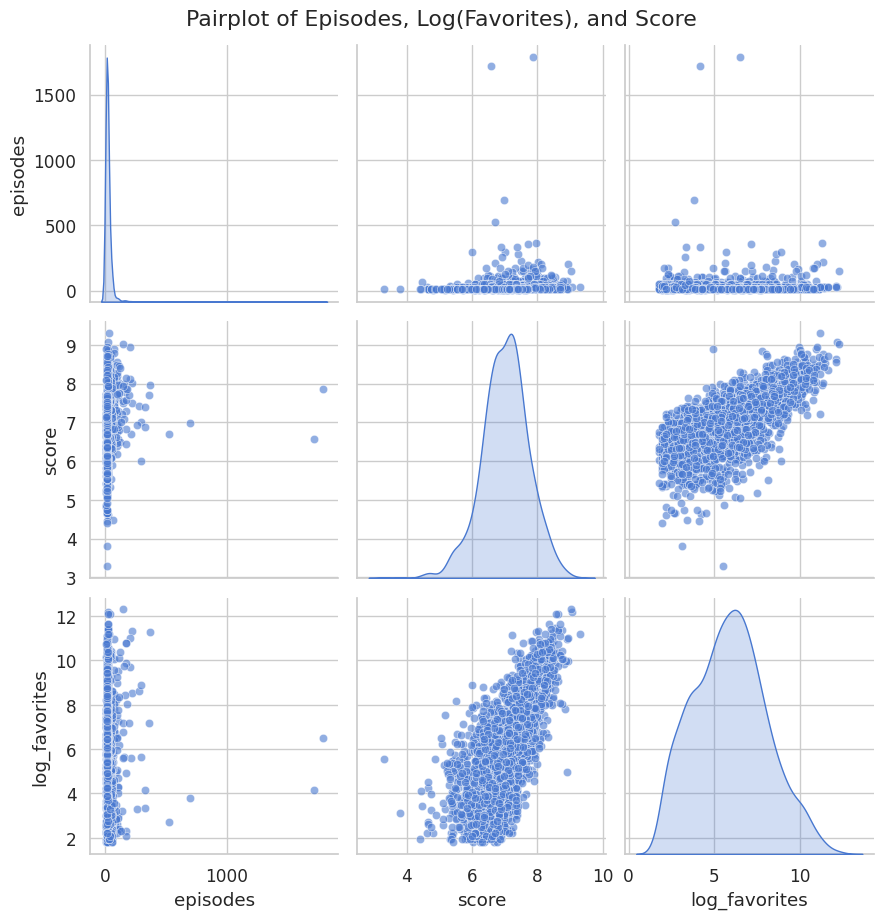

In [8]:
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Log-transform favorites
relationship_df = pd.DataFrame({
    'log_favorites': (anime_airing['favorites'] + 1).apply(np.log),
    'episodes': anime_airing['episodes'],
    'score': anime_airing['score'],
})

# Define variables for pairplot
pairplot_vars = ['episodes', 'score', 'log_favorites']

# Create pairplot
pairplot = sns.pairplot(relationship_df[pairplot_vars], diag_kind='kde', corner=False, height=3, plot_kws={'alpha':0.6})
pairplot.fig.suptitle("Pairplot of Episodes, Log(Favorites), and Score", y=1.02)
plt.show()

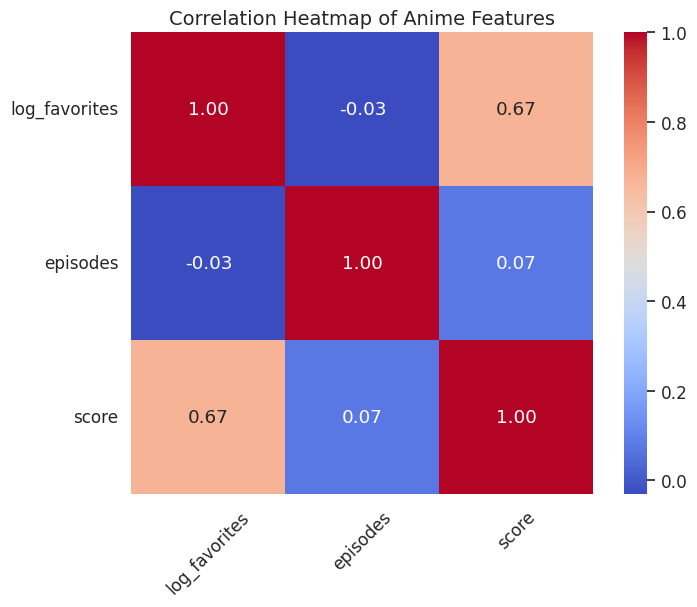

In [9]:
# Compute correlation matrix
corr_matrix = relationship_df.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Heatmap of Anime Features", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

### 1.2: Correlation between production cost, audience sentiment, and score 

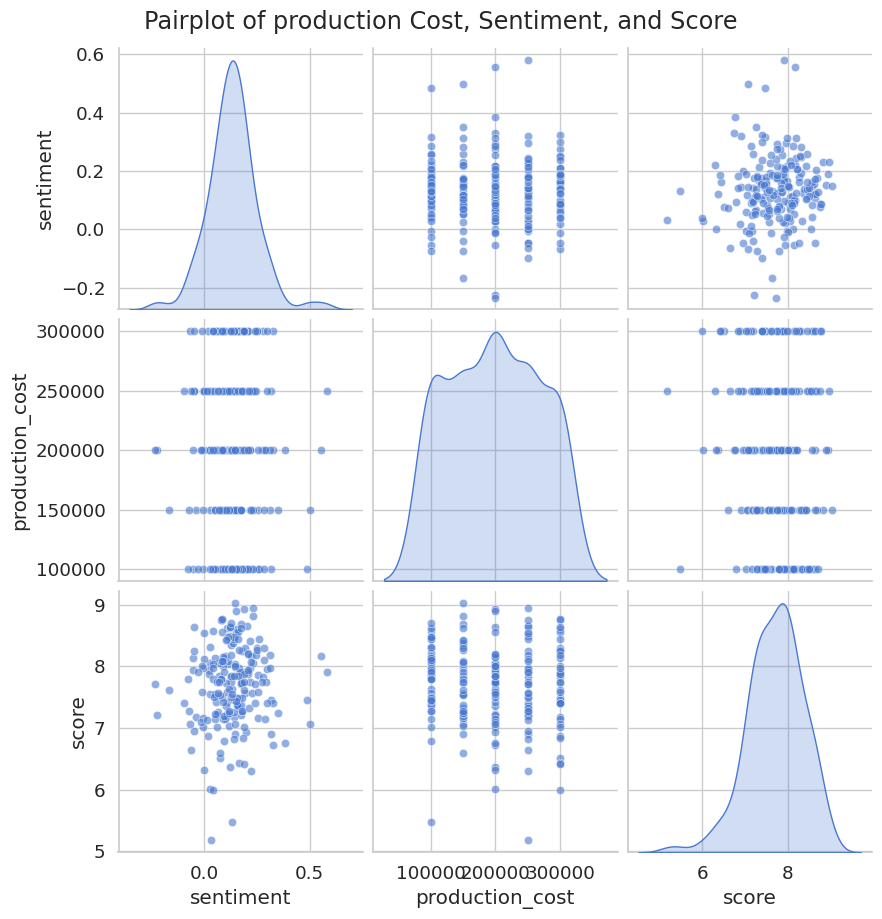

In [10]:
# Set Seaborn style
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# Prepare DataFrame
relationship_df2 = pd.DataFrame({
    'sentiment': sentiment_anime['avg_sentiment'],  
    'production_cost': sentiment_anime['production_cost'],
    'score': sentiment_anime['score']
})

# Variables to include in the pairplot
pairplot_vars = ['sentiment', 'production_cost', 'score']


# Create pairplot
pairplot = sns.pairplot(relationship_df2[pairplot_vars], diag_kind='kde', corner=False, height=3, plot_kws={'alpha':0.6})
pairplot.fig.suptitle("Pairplot of production Cost, Sentiment, and Score", y=1.02)
plt.show()

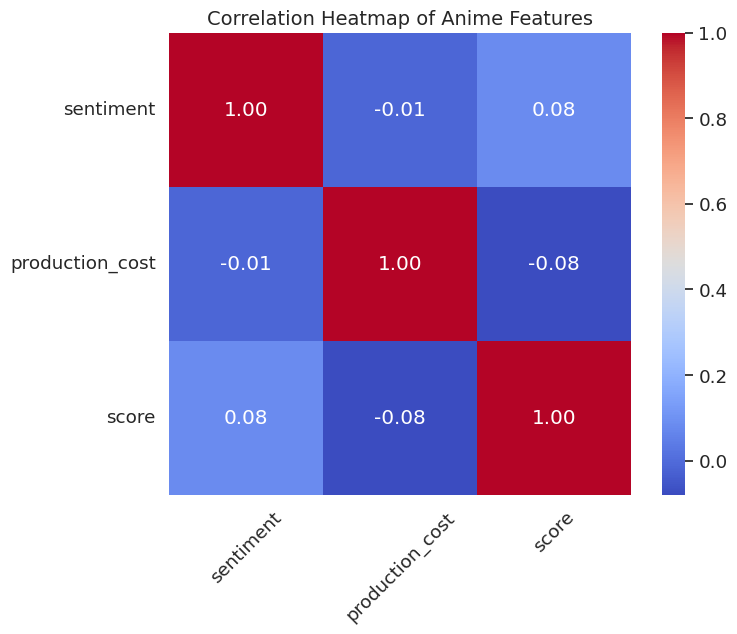

In [11]:
# Compute correlation matrix
corr_matrix = relationship_df2.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Heatmap of Anime Features", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

### 1.3: Correlation between production cost, total views, and score 

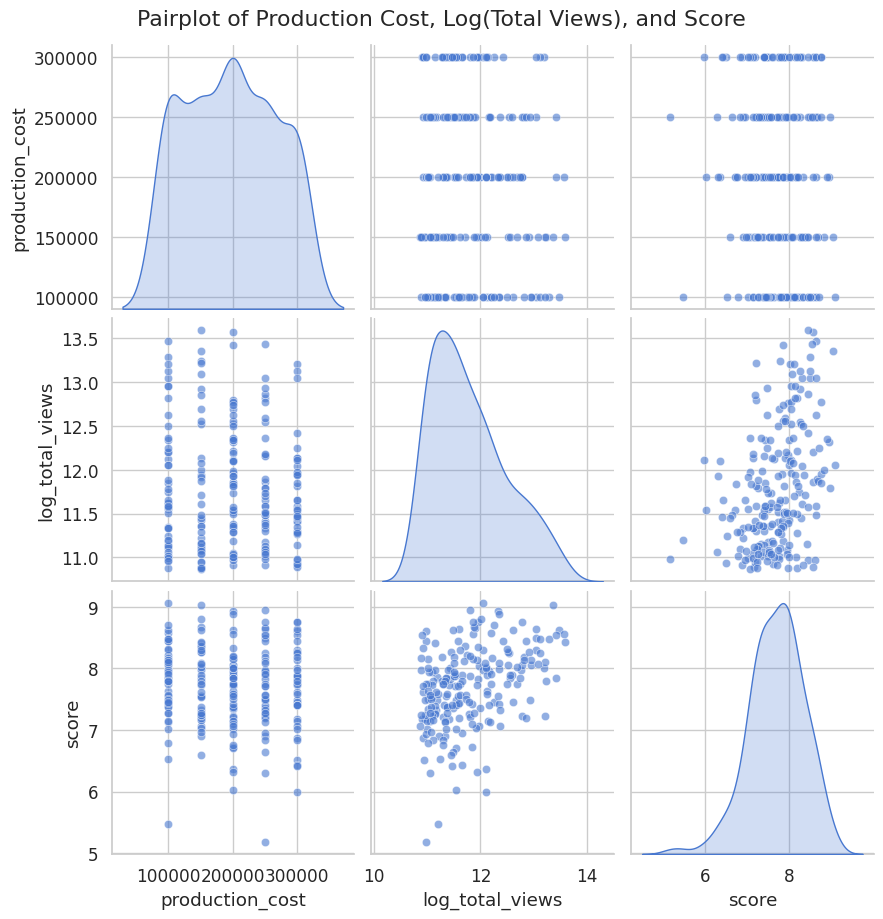

In [12]:
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

relationship_df3 = pd.DataFrame({
    'production_cost': anime_details['production_cost'],
    'log_total_views': (anime_details['total_views'] + 1).apply(np.log),
    'score': anime_details['score'],
})

# Define variables for pairplot
pairplot_vars = ['production_cost', 'log_total_views', 'score']

# Create pairplot
pairplot = sns.pairplot(relationship_df3[pairplot_vars], diag_kind='kde', corner=False, height=3, plot_kws={'alpha':0.6})
pairplot.fig.suptitle("Pairplot of Production Cost, Log(Total Views), and Score", y=1.02)
plt.show()

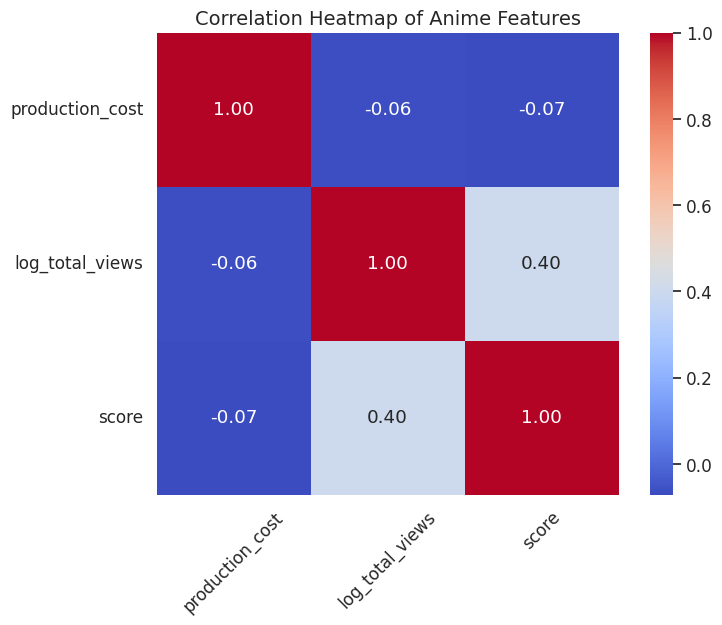

In [13]:
# Compute correlation matrix
corr_matrix = relationship_df3.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Heatmap of Anime Features", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

**Analysis:** Across these different visualizations, there are a few recurring takeaways. Overall, it seems that the majority of the pairs of variables have very weak correlations, with a heatmap value less than |0.1|. This suggests that most of these variables can be quite independent from each other and do not influence each other much. However, it can be observed that the anime's score has the strongest correlations. The score's highest heatmap values with other variables is 0.4 with total views and 0.67 with its number of logged favorites. Despite being stronger than the other relationships, scores and total views still do not have a strong correlation. It seems that the score and logged favorites have the strongest positive correlation at a value of 0.67 since it is closer to 1.

# 2. Relationship between quantatative features and CrunchyRoll award winning

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

In [14]:
def test_feature_logit(df, feature, target='cr_award_winner'):
    df = df[[feature, target]].copy()
    df[feature] = pd.to_numeric(df[feature], errors='coerce').fillna(df[feature].median())
    unique_vals = df[target].unique()
    if len(unique_vals) < 2:
        raise ValueError(f"Target must have at least two classes. Found: {unique_vals}")
    
    mapping = {unique_vals[0]: 1, unique_vals[1]: 0}
    df[target] = df[target].map(mapping)
    
    # Independent variables
    X = sm.add_constant(df[[feature]])
    y = df[target]
    
    # Logistic regression
    model = sm.Logit(y, X).fit(disp=False)
    print(model.summary())
    
    # Significance
    pval = model.pvalues[feature]
    if pval < 0.05:
        print(f"\nYES: '{feature}' is statistically significant — affects odds of winning.")
    else:
        print(f"\nNO: '{feature}' is not statistically significant — no independent effect detected.")

### 2.1: Significance of score 

In [15]:
test_feature_logit(anime_details, "score", target='cr_award_winner')

                           Logit Regression Results                           
Dep. Variable:        cr_award_winner   No. Observations:                  218
Model:                          Logit   Df Residuals:                      216
Method:                           MLE   Df Model:                            1
Date:                Fri, 28 Nov 2025   Pseudo R-squ.:                  0.1481
Time:                        10:03:50   Log-Likelihood:                -29.212
converged:                       True   LL-Null:                       -34.292
Covariance Type:            nonrobust   LLR p-value:                  0.001436
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.9376      6.548      3.197      0.001       8.103      33.772
score         -2.1980      0.787     -2.794      0.005      -3.740      -0.656

YES: 'score' is statistically significant — affects

### 2.2: Significance of production cost 

In [16]:
test_feature_logit(anime_details, "production_cost", target='cr_award_winner')

                           Logit Regression Results                           
Dep. Variable:        cr_award_winner   No. Observations:                  218
Model:                          Logit   Df Residuals:                      216
Method:                           MLE   Df Model:                            1
Date:                Fri, 28 Nov 2025   Pseudo R-squ.:               0.0003410
Time:                        10:03:50   Log-Likelihood:                -34.280
converged:                       True   LL-Null:                       -34.292
Covariance Type:            nonrobust   LLR p-value:                    0.8785
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.4254      1.102      3.110      0.002       1.266       5.584
production_cost -7.964e-07   5.21e-06     -0.153      0.878    -1.1e-05    9.41e-06

NO: 'production_cost' is not st

### 2.2: Significance of average sales per volume in million(s)

In [17]:
test_feature_logit(manga_anime, "average sales per volume in million(s)", target='cr_award_winner')

                           Logit Regression Results                           
Dep. Variable:        cr_award_winner   No. Observations:                   86
Model:                          Logit   Df Residuals:                       84
Method:                           MLE   Df Model:                            1
Date:                Fri, 28 Nov 2025   Pseudo R-squ.:                  0.4531
Time:                        10:03:51   Log-Likelihood:                -13.272
converged:                       True   LL-Null:                       -24.266
Covariance Type:            nonrobust   LLR p-value:                 2.743e-06
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      5.3288      1.156      4.609      0.000       3.063       7.595
average sales per volume in million(s)    -1.02

**Analysis:** The data shows that the anime's score and manga sales (if it is based off a manga) have p-values that are less than 0.05, which suggest that we can reject the null hypothesis for these variables. On the other hand, we fail to reject the null hypothesis for production cost. We can assume from these results that the budget of the anime is not a huge contributor to the anime's success as much as the score and manga popularity.

# 3. Relationship between genre and CrunchyRoll award winning factors


### 3.1: genre distribution

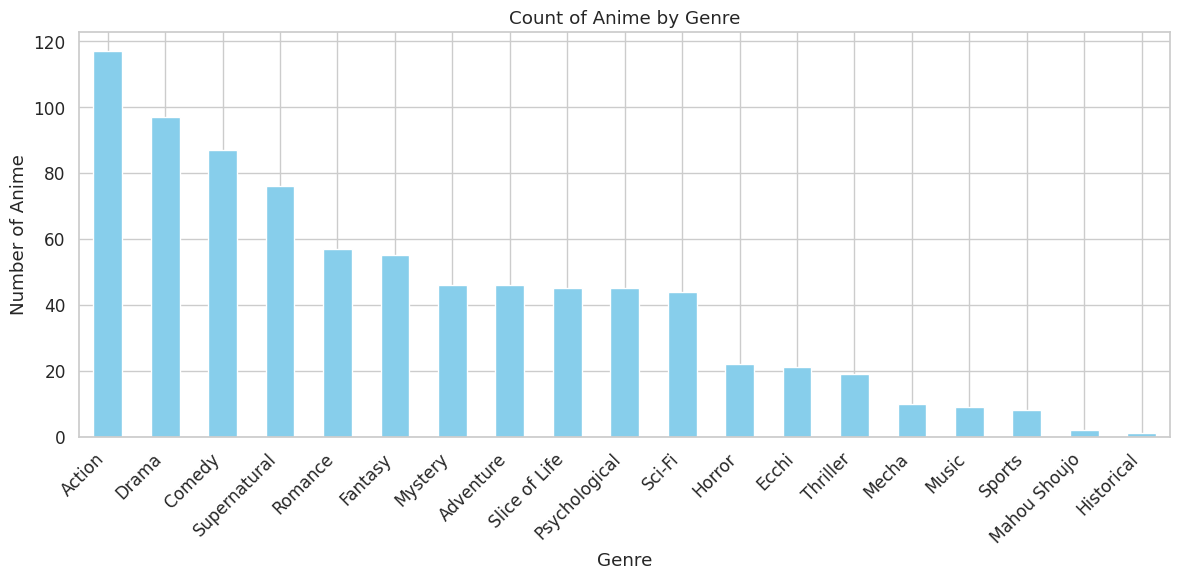

In [18]:
anime_details['genre_list'] = anime_details['genres'].apply(lambda x: [g.strip() for g in str(x).split(',') if g.strip() != ''])

# Flatten all genres into a single list
all_genres = [genre for sublist in anime_details['genre_list'] for genre in sublist]

# Count frequency of each genre
genre_counts = pd.Series(all_genres).value_counts().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12,6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Anime by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Anime')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 3.2: Relative frquency of genre of winners and non-winners

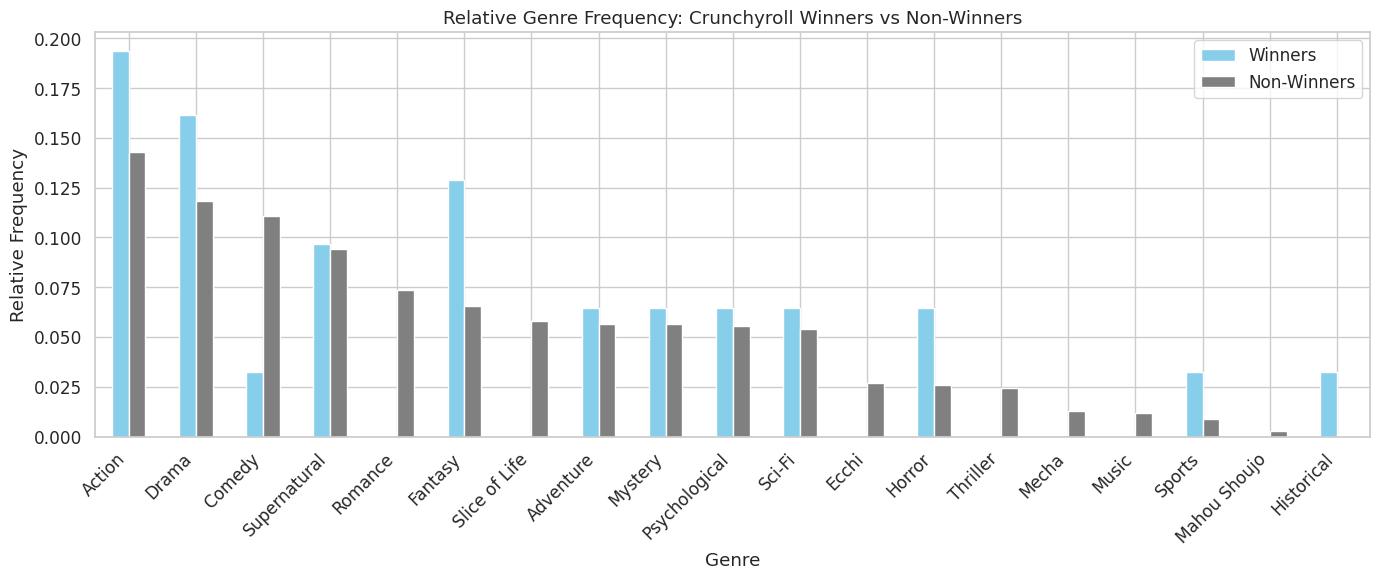

In [19]:
# Binary target: 1 = winner, 0 = non-winner
anime_details['cr_award_bin'] = anime_details['cr_award_winner'].apply(lambda x: 1 if str(x).lower().startswith('c') else 0)

# Split multi-label genres
anime_details['genre_list'] = anime_details['genres'].apply(lambda x: [g.strip() for g in str(x).split(',') if g.strip() != ''])

# Separate winners and non-winners
winners_list = anime_details.loc[anime_details['cr_award_bin']==1, 'genre_list'].tolist()
non_winners_list = anime_details.loc[anime_details['cr_award_bin']==0, 'genre_list'].tolist()

winners = [genre for sublist in winners_list for genre in sublist]
non_winners = [genre for sublist in non_winners_list for genre in sublist]

# Count frequencies
winner_counts = pd.Series(winners).value_counts()
non_winner_counts = pd.Series(non_winners).value_counts()

# Convert to relative frequency
winner_rel = winner_counts / winner_counts.sum() if not winner_counts.empty else pd.Series(dtype=float)
non_winner_rel = non_winner_counts / non_winner_counts.sum() if not non_winner_counts.empty else pd.Series(dtype=float)

# Combine into DataFrame
genre_df = pd.DataFrame({
    'Winners': winner_rel,
    'Non-Winners': non_winner_rel
}).fillna(0).sort_values(by='Non-Winners', ascending=False)

# Plot
genre_df.plot(kind='bar', figsize=(14,6), color=['skyblue','gray'])
plt.title('Relative Genre Frequency: Crunchyroll Winners vs Non-Winners')
plt.xlabel('Genre')
plt.ylabel('Relative Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 3.3: Significance of genre on score 

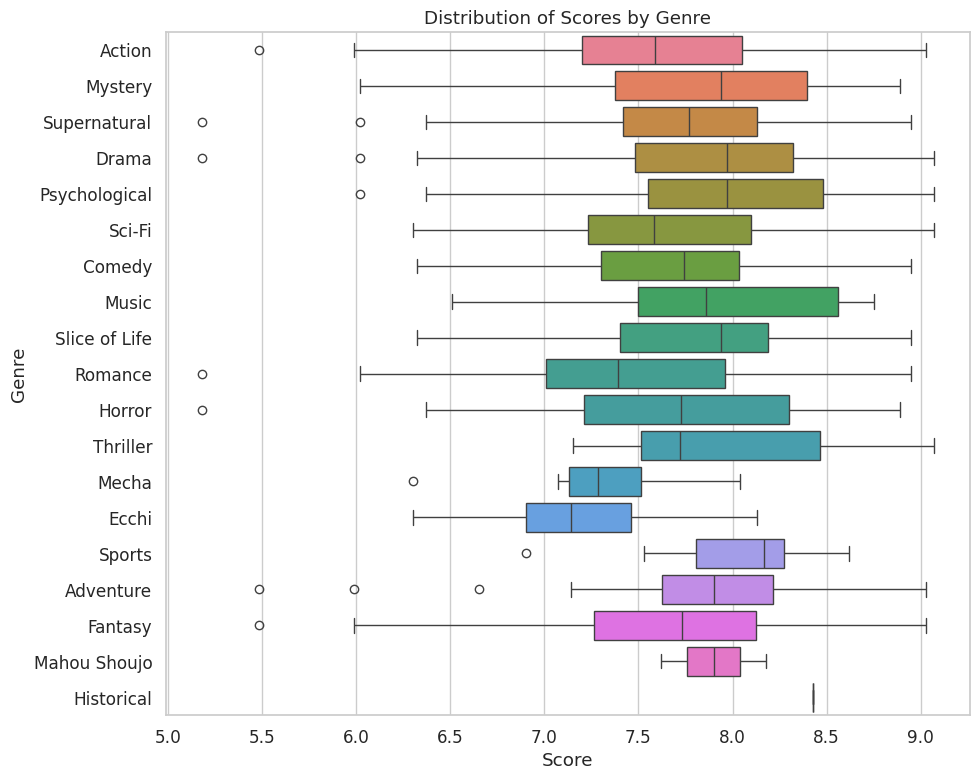

In [20]:
# Explode so each genre gets its own row
anime_exploded = anime_details.explode('genre_list')

# Convert score to numeric
anime_exploded['score'] = pd.to_numeric(anime_exploded['score'], errors='coerce')


plt.figure(figsize=(10,8))
sns.boxplot(
    y='genre_list',
    x='score',
    data=anime_exploded,
    hue='genre_list',     
    dodge=False,          
)
plt.title('Distribution of Scores by Genre')
plt.xlabel('Score')
plt.ylabel('Genre')
plt.legend([],[], frameon=False)  
plt.tight_layout()
plt.show()

### 3.4: Significance of genre on distribution of average sales per volume

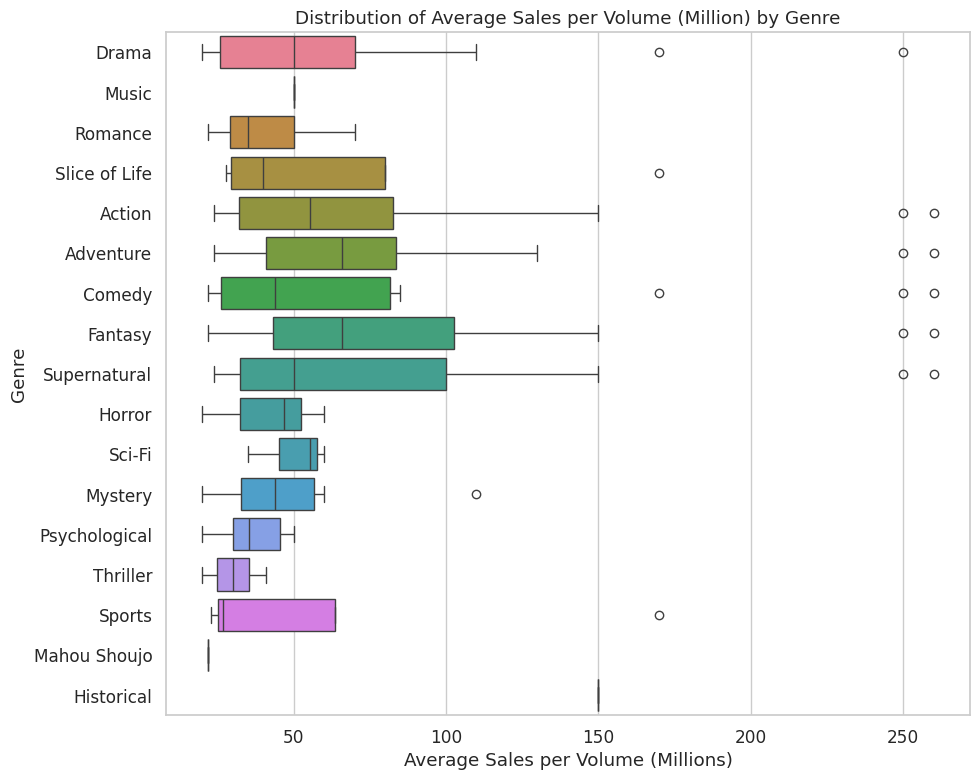

In [21]:
# Merge data
manga_anime_sales = pd.merge(
    manga_anime,
    anime_details,
    on='anime_norm_title',  
    how='inner'            
)

# Split multi-label genres
manga_anime_sales['genre_list'] = manga_anime_sales['genres'].apply(
    lambda x: [g.strip() for g in str(x).split(',') if g.strip() != '']
)

# Explode so each genre gets its own row
manga_exploded = manga_anime_sales.explode('genre_list')

# Plot horizontal box plot using hue to avoid FutureWarning
plt.figure(figsize=(10,8))
sns.boxplot(
    y='genre_list',
    x='approximate sales in million(s)',
    data=manga_exploded,
    hue='genre_list',    # map palette to hue
    dodge=False,
)
plt.title('Distribution of Average Sales per Volume (Million) by Genre')
plt.xlabel('Average Sales per Volume (Millions)')
plt.ylabel('Genre')
plt.legend([],[], frameon=False)  
plt.tight_layout()
plt.show()

**Analysis:** We can see that the most common genres of anime produced tended to be action and drama. These two genres also ended up having the most anime that won Crunchyroll awards. Interestingly, it seems that the median or even upper quartile scores and sales for the top genres did not heavily outperform other genres. This could mean that anime adaptations can be received very differently from their manga counterparts. Something that could have influenced these figures is that the less common genres have less media to be rated. In other words, the top genres could be oversaturated, meaning that there are a plethora of titles that could have been poorly rated despite many other popular animes being in the same genre. Meanwhile, in the less common genres, there could be less of a disparity in overall ratings across the titles released. For example, we see that music is one of the least common genres recorded, yet its distribution of scores top those of action, which is the top common genre. A similar phenomenon occurs in the distribution of average sales per volume, where the adventure genre's sales are ahead of action.

# 4. Relationship between manga publisher and CrunchyRoll award winning factors


### 4.1: Publisher distribution

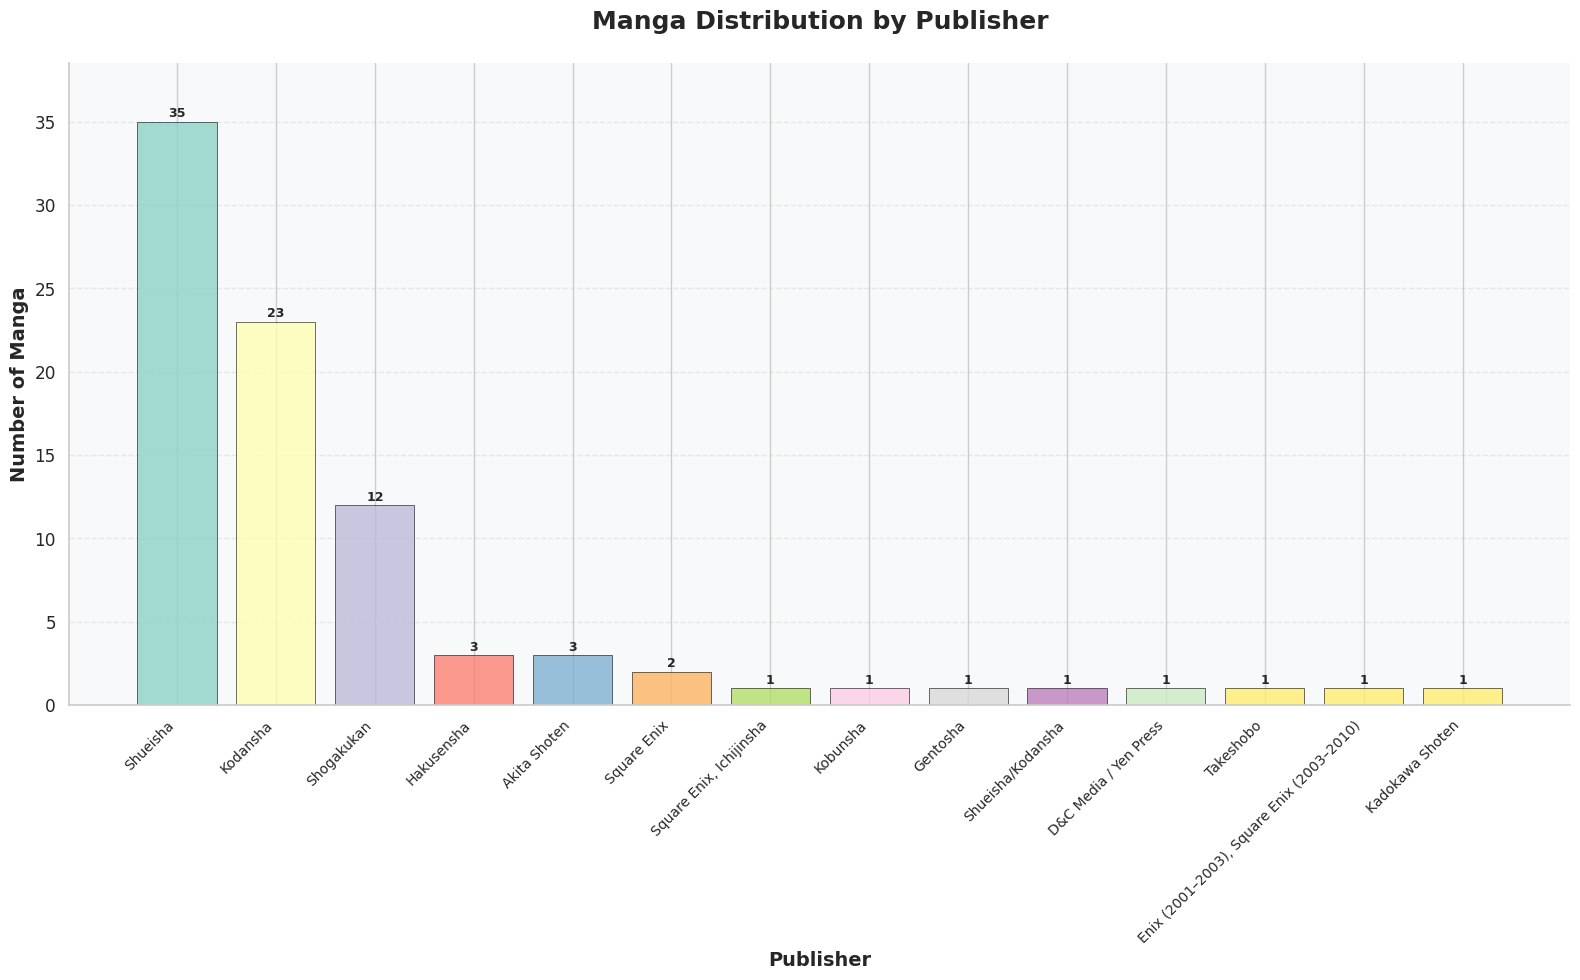

PUBLISHER DISTRIBUTION ANALYSIS
Total number of publishers: 14
Total number of manga: 86
Publisher with most manga: Shueisha (35 manga)
Average manga per publisher: 6.1
Median manga per publisher: 1.0
Number of publishers with only 1 manga: 8

TOP 10 PUBLISHERS:
------------------------------
 1. Shueisha             35 manga (40.7%)
 2. Kodansha             23 manga (26.7%)
 3. Shogakukan           12 manga (14.0%)
 4. Hakusensha            3 manga (3.5%)
 5. Akita Shoten          3 manga (3.5%)
 6. Square Enix           2 manga (2.3%)
 7. Square Enix, Ichijinsha  1 manga (1.2%)
 8. Kobunsha              1 manga (1.2%)
 9. Gentosha              1 manga (1.2%)
10. Shueisha/Kodansha     1 manga (1.2%)


In [22]:
# Count the frequency of each publisher
publisher_counts = manga_anime['publisher'].value_counts().sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(16, 10))
bars = plt.bar(publisher_counts.index, publisher_counts.values, 
               color=plt.cm.Set3(range(len(publisher_counts))), 
               edgecolor='black', alpha=0.8, linewidth=0.5)

# Customize the chart
plt.title('Manga Distribution by Publisher', fontsize=18, fontweight='bold', pad=25)
plt.xlabel('Publisher', fontsize=14, fontweight='bold')
plt.ylabel('Number of Manga', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{int(height)}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Improve grid and background
plt.grid(axis='y', alpha=0.4, linestyle='--')
plt.gca().set_facecolor('#f8f9fa')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adjust y-axis to start from 0 and add some padding at the top
plt.ylim(0, max(publisher_counts.values) * 1.1)

plt.tight_layout()
plt.show()

# Print enhanced summary statistics
print("PUBLISHER DISTRIBUTION ANALYSIS")
print("=" * 50)
print(f"Total number of publishers: {len(publisher_counts)}")
print(f"Total number of manga: {len(manga_anime)}")
print(f"Publisher with most manga: {publisher_counts.index[0]} ({publisher_counts.iloc[0]} manga)")
print(f"Average manga per publisher: {publisher_counts.mean():.1f}")
print(f"Median manga per publisher: {publisher_counts.median():.1f}")
print(f"Number of publishers with only 1 manga: {(publisher_counts == 1).sum()}")

# Show top 10 publishers
print("\nTOP 10 PUBLISHERS:")
print("-" * 30)
for i, (publisher, count) in enumerate(publisher_counts.head(10).items(), 1):
    percentage = (count / len(manga_anime)) * 100
    print(f"{i:2d}. {publisher:<20} {count:2d} manga ({percentage:.1f}%)")

### 4.2: Relative frquency of publisher of winners and non-winners

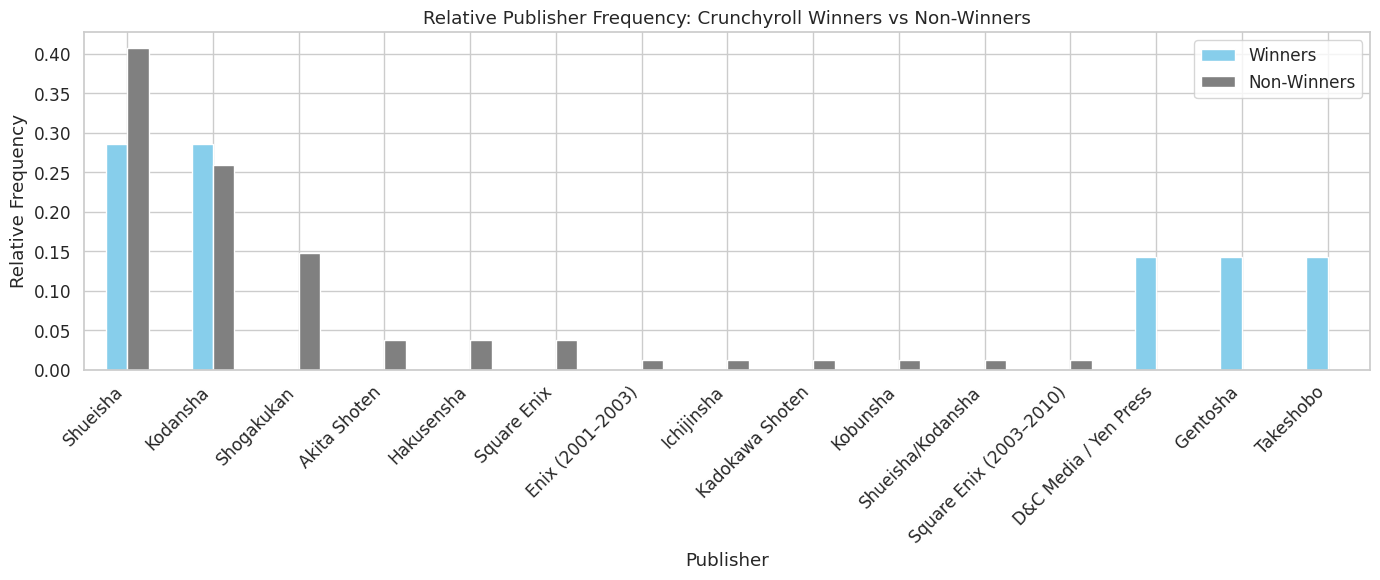

In [23]:
# Binary target: 1 = winner, 0 = non-winner
manga_anime['cr_award_bin'] = manga_anime['cr_award_winner'].apply(lambda x: 1 if str(x).lower().startswith('c') else 0)

# Split multi-label genres
manga_anime['publisher_list'] = manga_anime['publisher'].apply(lambda x: [g.strip() for g in str(x).split(',') if g.strip() != ''])

# Separate winners and non-winners
winners_list = manga_anime.loc[manga_anime['cr_award_bin']==1, 'publisher_list'].tolist()
non_winners_list = manga_anime.loc[manga_anime['cr_award_bin']==0, 'publisher_list'].tolist()

winners = [publisher for sublist in winners_list for publisher in sublist]
non_winners = [publisher for sublist in non_winners_list for publisher in sublist]

# Count frequencies
winner_counts = pd.Series(winners).value_counts()
non_winner_counts = pd.Series(non_winners).value_counts()

# Convert to relative frequency
winner_rel = winner_counts / winner_counts.sum() if not winner_counts.empty else pd.Series(dtype=float)
non_winner_rel = non_winner_counts / non_winner_counts.sum() if not non_winner_counts.empty else pd.Series(dtype=float)

# Combine into DataFrame
publisher_df = pd.DataFrame({
    'Winners': winner_rel,
    'Non-Winners': non_winner_rel
}).fillna(0).sort_values(by='Non-Winners', ascending=False)

# Plot
publisher_df.plot(kind='bar', figsize=(14,6), color=['skyblue','gray'])
plt.title('Relative Publisher Frequency: Crunchyroll Winners vs Non-Winners')
plt.xlabel('Publisher')
plt.ylabel('Relative Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 4.3: Significance of publisher on distribution of average sales per volume

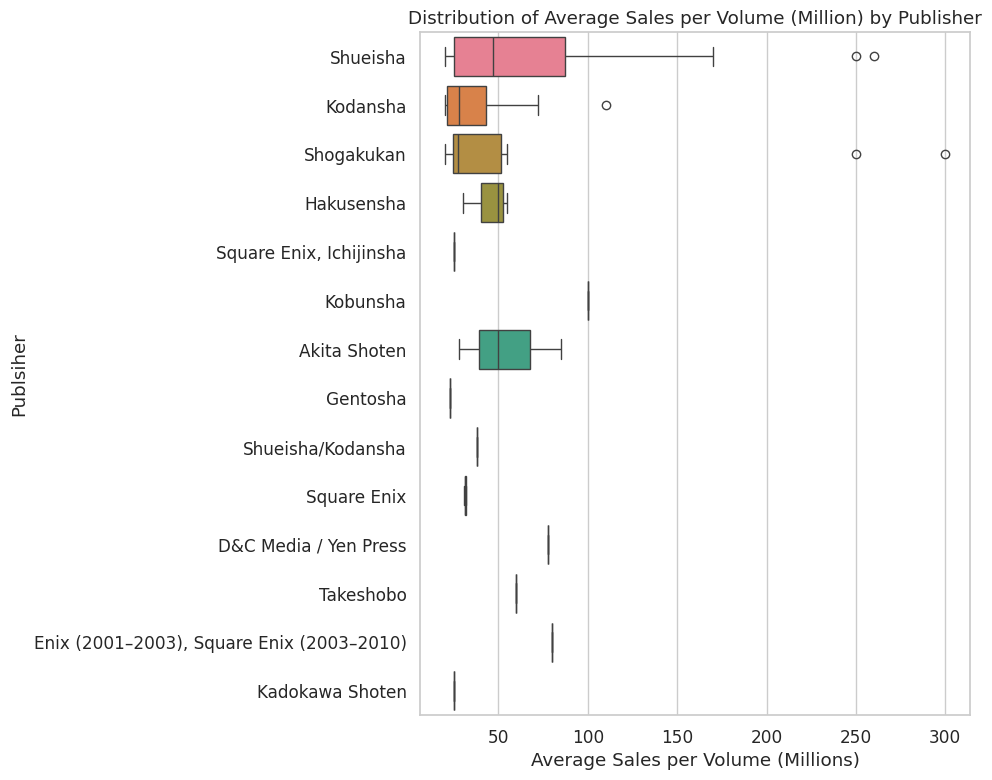

In [24]:
# Plot horizontal box plot using hue to avoid FutureWarning
plt.figure(figsize=(10,8))
sns.boxplot(
    y='publisher',
    x='approximate sales in million(s)',
    data=manga_anime,
    hue='publisher',    # map palette to hue
    dodge=False,
)
plt.title('Distribution of Average Sales per Volume (Million) by Publisher')
plt.xlabel('Average Sales per Volume (Millions)')
plt.ylabel('Publsiher')
plt.legend([],[], frameon=False)  
plt.tight_layout()
plt.show()

### 4.4: Publisher and number of CrunchyRoll Award 

In [25]:
# Filter and process data for Crunchyroll Award winning publishers
crunchyroll_winners = manga_anime[manga_anime['cr_award_winner'] == 'Crunchyroll Award Winner']
crunchyroll_publishers_counts = crunchyroll_winners['publisher'].value_counts().sort_values(ascending=False)

# Simple static display
if len(crunchyroll_publishers_counts) > 0:
    print("CRUNCHYROLL AWARD WINNING PUBLISHERS")
    print("=" * 60)
    
    for publisher, award_count in crunchyroll_publishers_counts.items():
        # Count total works by this publisher in the entire dataset
        total_works = manga_anime[manga_anime['publisher'] == publisher].shape[0]
        
        print(f"• {publisher}: {award_count} award(s) | {total_works} total manga")
    
    print(f"\nTotal: {len(crunchyroll_publishers_counts)} award-winning publishers, {len(crunchyroll_winners)} award-winning manga")
    
else:
    print("No Crunchyroll Award winners found.")

CRUNCHYROLL AWARD WINNING PUBLISHERS
• Shueisha: 2 award(s) | 35 total manga
• Kodansha: 2 award(s) | 23 total manga
• Gentosha: 1 award(s) | 1 total manga
• D&C Media / Yen Press: 1 award(s) | 1 total manga
• Takeshobo: 1 award(s) | 1 total manga

Total: 5 award-winning publishers, 7 award-winning manga


**Analysis:** The top publishers with the most works had many more sales on average. However, it is mainly the top-most publishers winning Crunchyroll awards. There are some publishers with less works that have won awards though. These same smaller publishers did not have nearly as many manga sales. It is a possibility that the anime adaptation caused their award-winning titles to gain traction, thus not having 

# 5. Relationship between studio and CrunchyRoll award winning factors


### 5.1: Studio distribution

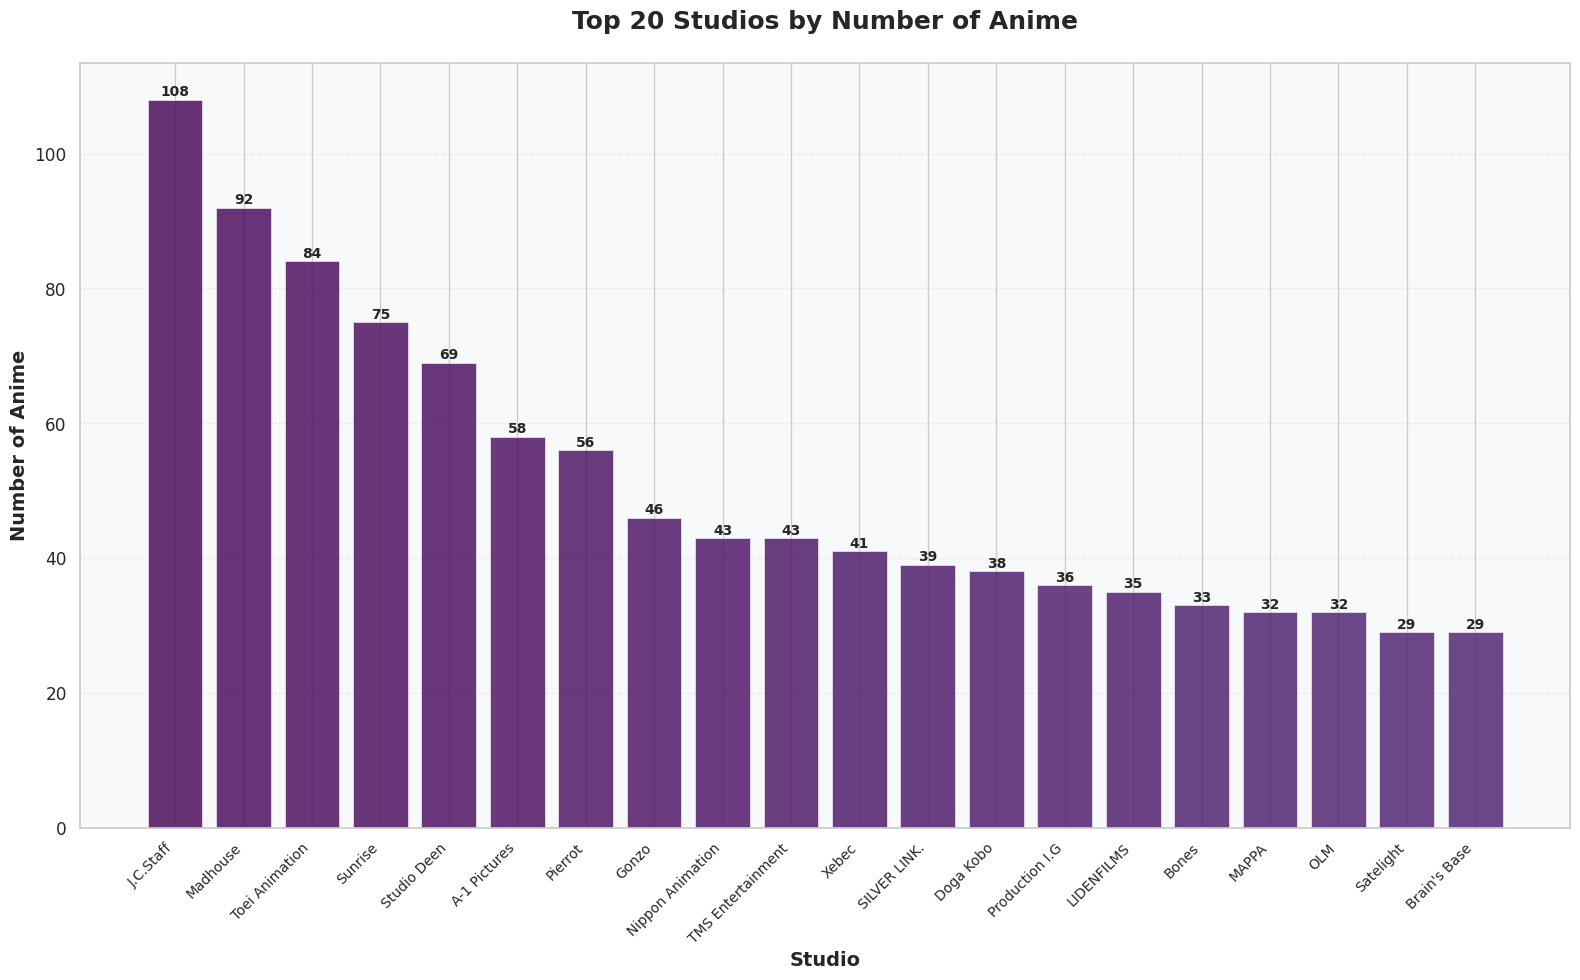

STUDIO DISTRIBUTION ANALYSIS
Total number of studios: 435
Total number of anime: 2357
Studio with most anime: J.C.Staff (108 anime)
Top 20 studios represent 1018/2357 anime (43.2%)


In [26]:
# Count the frequency of each studio and get top 20
studio_counts = anime_airing['studios'].value_counts().sort_values(ascending=False)
top_studios = studio_counts.head(20)

# Create the bar chart
plt.figure(figsize=(16, 10))
bars = plt.bar(top_studios.index, top_studios.values, 
               color=plt.cm.viridis(range(len(top_studios))), 
               edgecolor='white', alpha=0.8, linewidth=0.5)

# Customize the chart
plt.title('Top 20 Studios by Number of Anime', fontsize=18, fontweight='bold', pad=25)
plt.xlabel('Studio', fontsize=14, fontweight='bold')
plt.ylabel('Number of Anime', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{int(height)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Improve grid and background
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.gca().set_facecolor('#f8f9fa')

plt.tight_layout()
plt.show()

# Print summary statistics
print("STUDIO DISTRIBUTION ANALYSIS")
print("=" * 50)
print(f"Total number of studios: {len(studio_counts)}")
print(f"Total number of anime: {len(anime_airing)}")
print(f"Studio with most anime: {studio_counts.index[0]} ({studio_counts.iloc[0]} anime)")
print(f"Top 20 studios represent {top_studios.sum()}/{len(anime_airing)} anime ({(top_studios.sum()/len(anime_airing))*100:.1f}%)")

In [30]:
crunchyroll_winners = anime_airing[anime_airing['cr_award_winner'] == 'Crunchyroll Award Winner']
crunchyroll_publishers_counts = crunchyroll_winners['studios'].value_counts().sort_values(ascending=False)

if len(crunchyroll_publishers_counts) > 0:
    print("CRUNCHYROLL AWARD WINNING STUDIOS")
    print("=" * 60)
    
    for studios, award_count in crunchyroll_publishers_counts.items():
        total_works = anime_airing[anime_airing['studios'] == studios].shape[0]
        
        print(f"• {studios}: {award_count} award(s) | {total_works} total manga")
    
    print(f"\nTotal: {len(crunchyroll_publishers_counts)} award-winning studios, {len(crunchyroll_winners)} award-winning anime")
    
else:
    print("No Crunchyroll Award winners found.")

CRUNCHYROLL AWARD WINNING STUDIOS
• MAPPA: 3 award(s) | 32 total manga
• A-1 Pictures: 1 award(s) | 58 total manga
• Kinema Citrus: 1 award(s) | 8 total manga
• Science SARU: 1 award(s) | 5 total manga
• Studio Trigger: 1 award(s) | 1 total manga
• ufotable: 1 award(s) | 7 total manga

Total: 6 award-winning studios, 8 award-winning anime


**Analysis:** The top studios with the most anime have a lot more total works compared to others. However, it’s mostly the bigger and more well-known studios like MAPPA and A-1 Pictures that are winning Crunchyroll awards. There are a few smaller studios like Kinema Citrus, Science SARU, and ufotable that have also won awards even though they don’t make as many shows. These smaller studios don’t produce nearly the same amount as the big ones, which suggests that quality and creativity might matter more than how much they produce. It’s possible that their unique storytelling or animation style helped their titles stand out and gain recognition even without having a huge number of productions.

## Ethics 


Instructions: Keep the contents of this cell. For each item on the checklist
-  put an X there if you've considered the item
-  IF THE ITEM IS RELEVANT place a short paragraph after the checklist item discussing the issue.
  
Items on this checklist are meant to provoke discussion among good-faith actors who take their ethical responsibilities seriously. Your teams will document these discussions and decisions for posterity using this section.  You don't have to solve these problems, you just have to acknowledge any potential harm no matter how unlikely.

Here is a [list of real world examples](https://deon.drivendata.org/examples/) for each item in the checklist that can refer to.

[![Deon badge](https://img.shields.io/badge/ethics%20checklist-deon-brightgreen.svg?style=popout-square)](http://deon.drivendata.org/)

### A. Data Collection
 - [X] **A.1 Informed consent**: If there are human subjects, have they given informed consent, where subjects affirmatively opt-in and have a clear understanding of the data uses to which they consent?

> The social media posts that we want to take data from will all contain publicly available posts. Assuming that they allow for people to see and discuss their posts, then we are also assuming that they consent to their data being used. We will not be taking data from places such as private accounts or direct messages between people. However, it is possible that people could still feel violated because they were not told that their posts would be used for data. There could also be more personal data that gets swept up in the process of us looking for data.

 - [X] **A.2 Collection bias**: Have we considered sources of bias that could be introduced during data collection and survey design and taken steps to mitigate those?
> Because most of the data like anime rating are collected through viewer volunteerly rating the anime out of 10. We have to consider the possibility that only viewers with a strong viewpoint either positively or negatively will volunteerly rate the anime. 
 - [ ] **A.3 Limit PII exposure**: Have we considered ways to minimize exposure of personally identifiable information (PII) for example through anonymization or not collecting information that isn't relevant for analysis?
 - [ ] **A.4 Downstream bias mitigation**: Have we considered ways to enable testing downstream results for biased outcomes (e.g., collecting data on protected group status like race or gender)?

### B. Data Storage
 - [ ] **B.1 Data security**: Do we have a plan to protect and secure data (e.g., encryption at rest and in transit, access controls on internal users and third parties, access logs, and up-to-date software)?
 - [ ] **B.2 Right to be forgotten**: Do we have a mechanism through which an individual can request their personal information be removed?
 - [ ] **B.3 Data retention plan**: Is there a schedule or plan to delete the data after it is no longer needed?

### C. Analysis
 - [X] **C.1 Missing perspectives**: Have we sought to address blindspots in the analysis through engagement with relevant stakeholders (e.g., checking assumptions and discussing implications with affected communities and subject matter experts)?
> It is only public opinions that we are recording for our sentiment analysis. This could leave out many people who do not publicly voice their opinion but vote for the anime of the year award. This could potentially affect the accuracy of our data. Certain comments about an anime could also be based on memes or those who have not actually watched it, so there is also the issue of not being able to account for the seriousness of posts. There are also people who might not directly mention the name of the anime that they are referring to in their posts.
 - [ ] **C.2 Dataset bias**: Have we examined the data for possible sources of bias and taken steps to mitigate or address these biases (e.g., stereotype perpetuation, confirmation bias, imbalanced classes, or omitted confounding variables)?
 - [ ] **C.3 Honest representation**: Are our visualizations, summary statistics, and reports designed to honestly represent the underlying data?
 - [ ] **C.4 Privacy in analysis**: Have we ensured that data with PII are not used or displayed unless necessary for the analysis?
 - [X] **C.5 Auditability**: Is the process of generating the analysis well documented and reproducible if we discover issues in the future?
> As we are basing most of our data on public sentiment, there could be a lot of it that might not be reproducible. Posts can be deleted or edited. From there, it implies that the user may not consent to those words being used as data again. However, other sources of data, such as sales of merchandise, can be replicated.
### D. Modeling
 - [X] **D.1 Proxy discrimination**: Have we ensured that the model does not rely on variables or proxies for variables that are unfairly discriminatory?
> The models will be based purely on public reception, the resources, and companies involved in the creation of anime shows. In no way should we group fans and creators based on traits such as gender or ethnicity, even if we are trying to evaluate genres that people like. For example, it could be said that a romance anime would only get popular if the voters were majority female. It can create a close-minded and stereotypical view of these groups. We should instead focus on factors that anime fans as a whole will prefer, such as production quality.
 - [ ] **D.2 Fairness across groups**: Have we tested model results for fairness with respect to different affected groups (e.g., tested for disparate error rates)?
 - [ ] **D.3 Metric selection**: Have we considered the effects of optimizing for our defined metrics and considered additional metrics?
 - [ ] **D.4 Explainability**: Can we explain in understandable terms a decision the model made in cases where a justification is needed?
 - [ ] **D.5 Communicate limitations**: Have we communicated the shortcomings, limitations, and biases of the model to relevant stakeholders in ways that can be generally understood?

### E. Deployment
 - [ ] **E.1 Monitoring and evaluation**: Do we have a clear plan to monitor the model and its impacts after it is deployed (e.g., performance monitoring, regular audit of sample predictions, human review of high-stakes decisions, reviewing downstream impacts of errors or low-confidence decisions, testing for concept drift)?
> There could be merchants and retailers that abuse this data to hoard stock for merchandise such as figurines, manga volumes, and DVDs that could create scarcity in markets. Not only that, but the scarcity can have resellers mark prices up, which could further impact the recreatability of our data.
 - [ ] **E.2 Redress**: Have we discussed with our organization a plan for response if users are harmed by the results (e.g., how does the data science team evaluate these cases and update analysis and models to prevent future harm)?
 - [ ] **E.3 Roll back**: Is there a way to turn off or roll back the model in production if necessary?
 - [X] **E.4 Unintended use**: Have we taken steps to identify and prevent unintended uses and abuse of the model and do we have a plan to monitor these once the model is deployed?
> A potential issue that we have is that companies could use our data models to gain an unfair advantage against competitors in the industry. They could use this data and its implications to manipulate the odds towards themselves getting the award rather than letting the voting take its course naturally. This would not be fair towards other studios who are doing genuine hard work to have a fighting chance of winning. Similarly, the data could be weaponized to sabotage votes in ways such as using bot accounts to increase negative feedback on websites such as MyAnimeList.

## Team Expectations 

Our team will communicate primarily through Discord for daily updates and GitHub for version control. We will meet weekly via Discord or Zoom, and all members are expected to respond to messages within 24 hours.

We agree to maintain a respectful, clear, and polite tone, encouraging participation from everyone. Decisions will be made through majority agreement, but role leads may decide on smaller or time-sensitive matters when needed.

Tasks will be divided based on interest and strengths, with rotating leads for data wrangling, EDA/visualization, modeling, and writing/editing. Everyone will contribute fairly to each aspect of the project, and progress will be tracked through a shared Google Sheet or GitHub issues.

If conflicts arise, we will address them respectfully and directly, prioritizing understanding over blame. Persistent issues will be escalated to the TA or instructor if needed. Each teammate is responsible for communicating challenges early, contributing equally, and maintaining academic integrity throughout the project.

## Project Timeline Proposal

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 10/8  |  6 pm | Read & Think about COGS 108 expectations; brainstorm topics/questions  | Decide on group communication (Discord), finalize topic; discuss hypothesis and project goals | 
| 10/15  |  6 pm |  Conduct background research on Crunchyroll Awards and relevant data sources | Discuss key variables (popularity, engagement, production), potential datasets (MAL, Reddit/Twitter APIs, etc.); start writing Project Proposal | 
| 10/29  | 6 pm  | Finalize project proposal draft, identify datasets | Discuss wrangling strategies, ethical concerns, and assign roles such as data wrangling, modeling, visualization, writing|
| 11/15  | 6 pm  | 	Import and begin cleaning datasets; start basic EDA | Review data wrangling and cleaning; discuss findings and plan improvements for Checkpoint #1 (Data)  |
| 11/25  | 6 pm  | Finalize data cleaning; conduct full EDA with visualizations | Review and edit EDA; finalize Checkpoint #2: EDA submission; develop analysis and modeling plan |
| 11/30  | 6 pm  | Complete final model, generate predictions/insights |  Integrate results into paper; review visualizations; finalize writeup and prepare short group video |
| 12/3  | 6 pm  | Final edits to report and video | Finalize and revise project / submit |